In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 

In [23]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Pujem l'arxiu

In [24]:
from google.colab import files
uploaded=files.upload()

Saving analisis.csv to analisis (1).csv


In [25]:
dataframe = pd.read_csv("analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [26]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


Mostrem el numero de persones en cada categoria

In [27]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Mostrem en forma de histograma totes les dimensions de cada persona de totes les categories

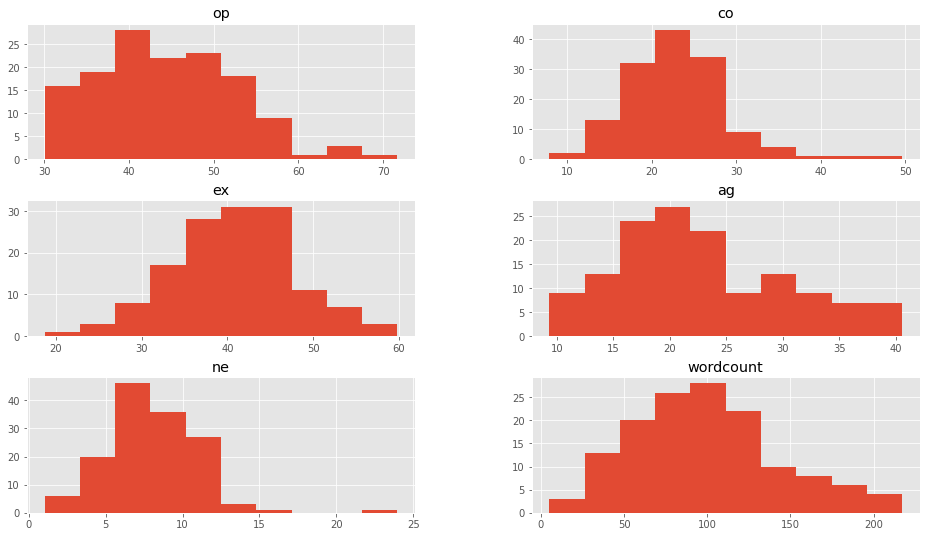

In [28]:
dataframe.drop(['categoria'],1).hist()
plt.show()

Realitzem un grafica d'estil pairplot. Nem comparant dos dimensións a les parceles i mostrem de forma diagonal els grafics de densitat dels resultats obtinguts d'abans. De moment no es troba cap relació de manera clara. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


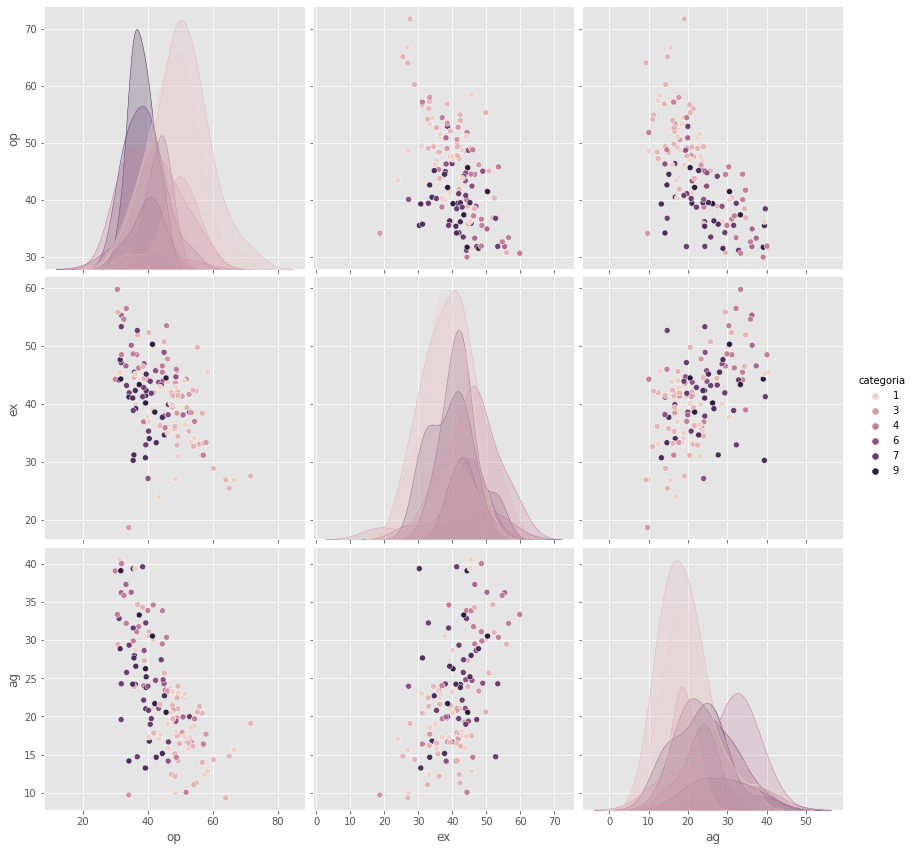

In [29]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

Guardem la estructura de dades que volguem utilitzar a continucació.

In [30]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Mostrem un gràfic de dispersió en 3d amb les 9 categories. I passem els valors guardats anteriorment per representar. 

Creem 2 arrays un per establir colors i l'altre per assignar-los al gràfic. En la funció d' scatter establim els colors mitjançant el paràmetre c. 

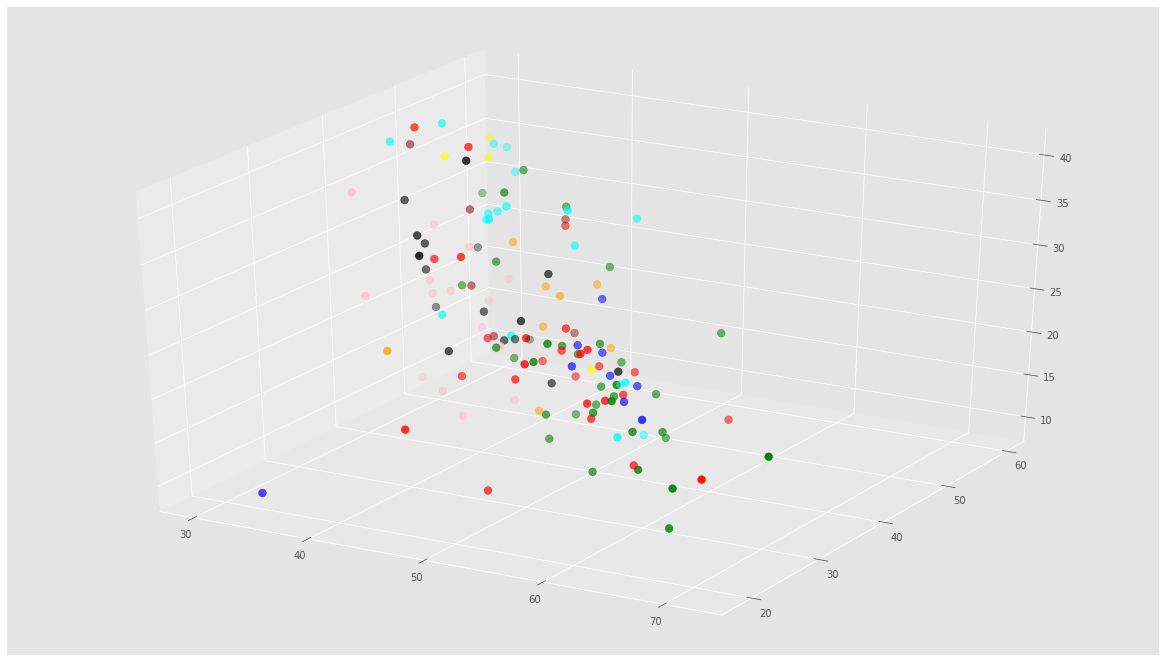

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

limitem el ús de de les dades a utiltzar a 20. Despres realitzem un gràfic de linia comparant aquests 3 factors.

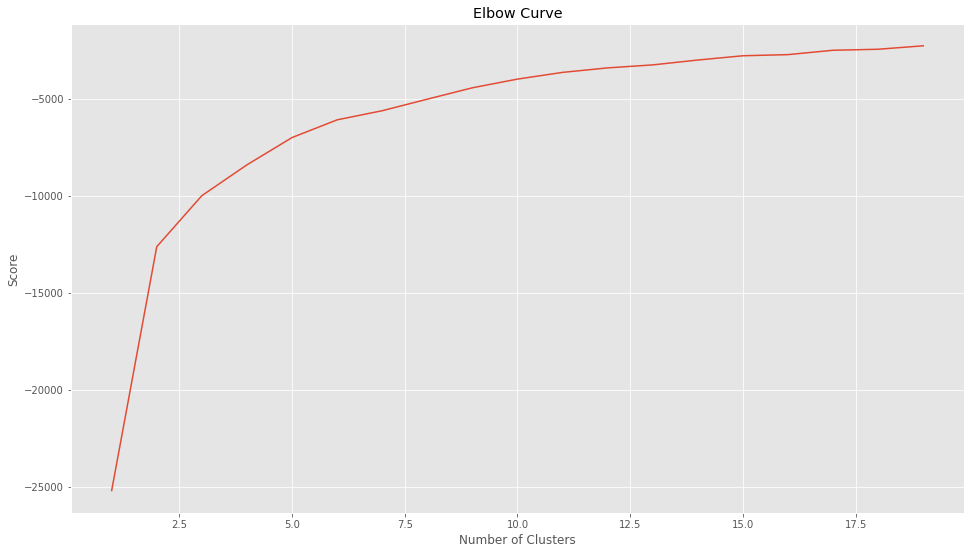

In [32]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realitzem 5 agrupacions. En aquestes agrupacions trobem els centres de cada cluster de cada categoria.

In [33]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.42588653 40.66723528 17.30892462]
 [35.90241306 47.56828232 33.58748762]
 [40.14744474 43.54690971 23.11790265]
 [58.70462307 30.53566167 15.72207033]
 [42.75925435 32.7509888  21.08881555]]


Realitzem el grafic de dispersió en 3d i aquest cop marquem els centres dels clusters.

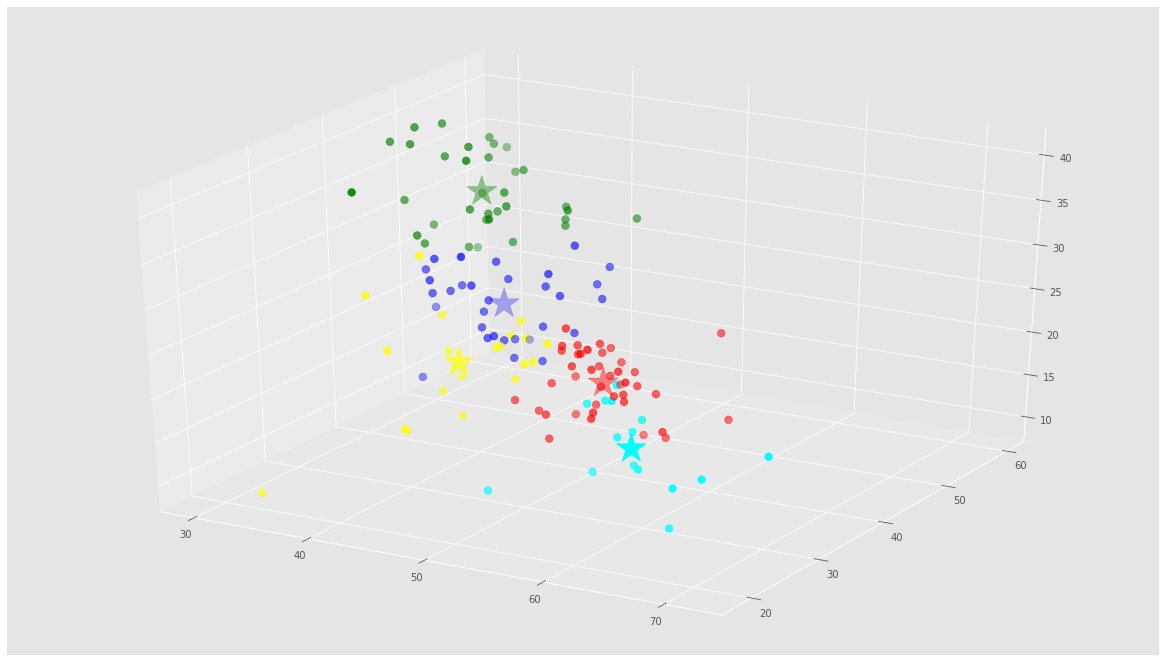

In [34]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Realitzem 3 grafics en 2d. Comparem els 3 grafics canviant els camps.

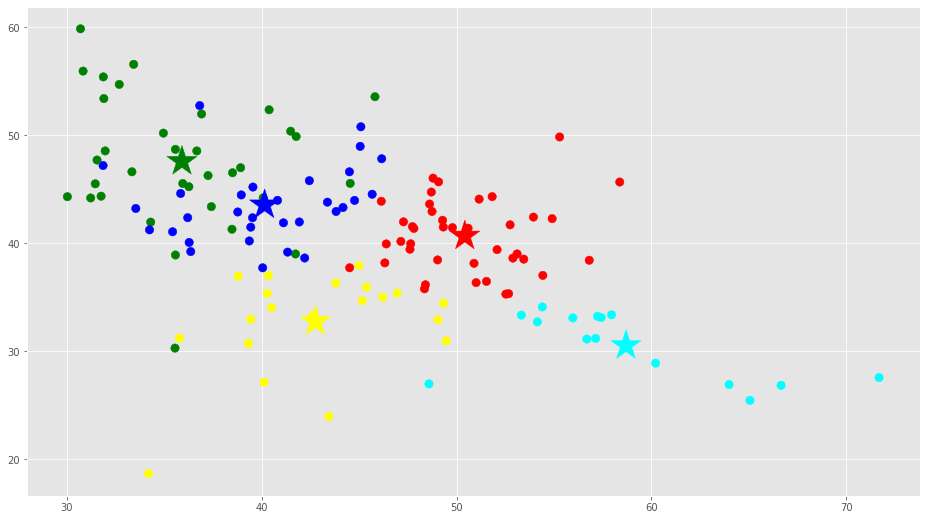

In [35]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

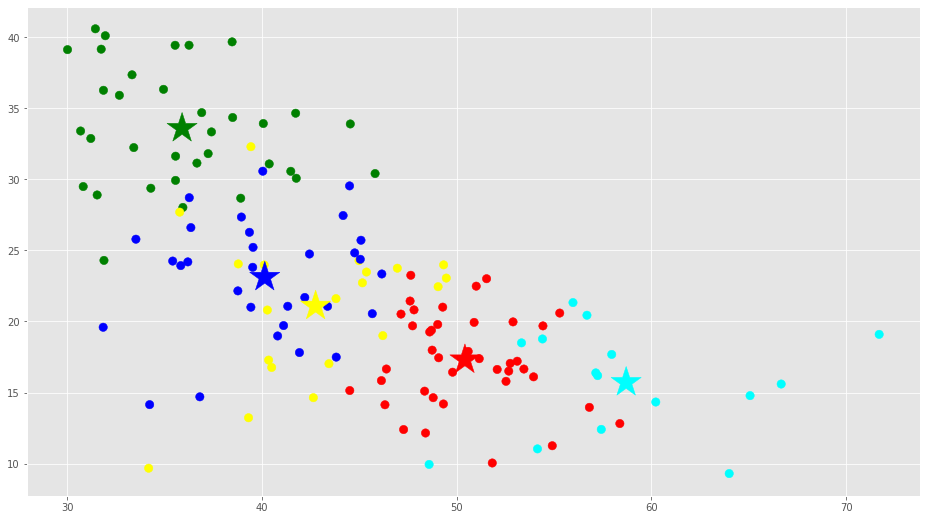

In [36]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

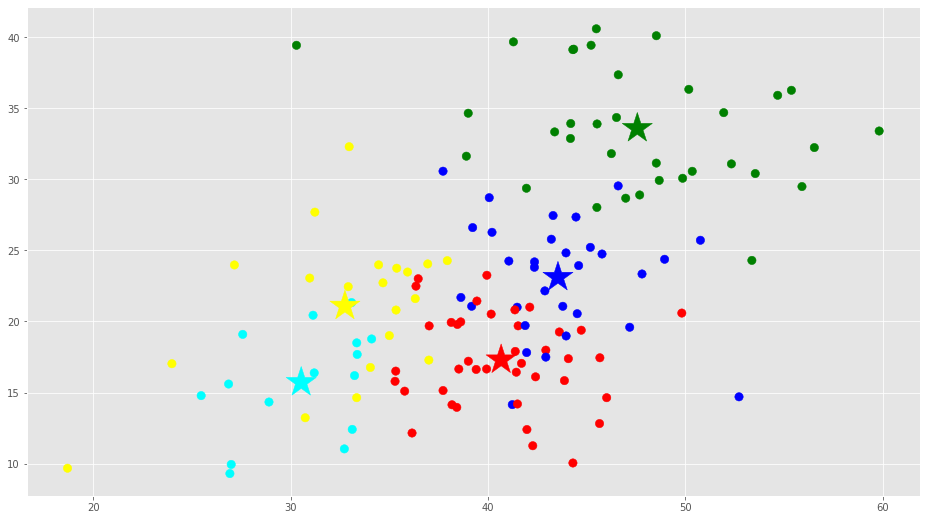

In [37]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()


Copia les dades dels inputs i només afecta als dataframes.

In [38]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,40
1,green,34
2,blue,31
3,cyan,15
4,yellow,20


Consulta la quantitat que existeixen o que hi ha en una determinada categoria. El 0 es NAN perque nomes tenim categories del 1 al 9.

In [39]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,10.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,NaN


Aqui farem la comprovació de qui esta mes a prop del seu centroide.

In [40]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21,  98,  64,  82, 120])

Carreguem tots els usuaris i els imprimim a continuació.

In [41]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
maria_patino
ierrejon
JudgeJudy
SarahPalinUSA


Amb les seguents funcións comprovarem el grup al que pertany.

In [42]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]


**1. Com es calculen els centroids dels clústers?**
Agrupant en base a les similituds de les seves caracteristiques(les columnes).    
**2. Quantes iteracions cal realitzar per trobar-lo?**
Depenent de les dades que tinguis pero hi ha un minim de 2. Podrem fer tantes iteracions com ens fagi falta depenent de cada cas.  

**3. Què és l’Elbow curve?**
Es tracta d'un mètode per determinar el número de clusters d'un conjunt de dades. Els reusltats s'obtenen en forma de grafic.  

**4. Com es determina el nombre de clústers o agrupaments (k)?**
Realitzant el mètode de elbow, en el qual obtenim aquest número de clusters com menciono en la pregunta anterior.